In [2]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31372\3118345031.py:41: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31372\3118345031.py:44: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


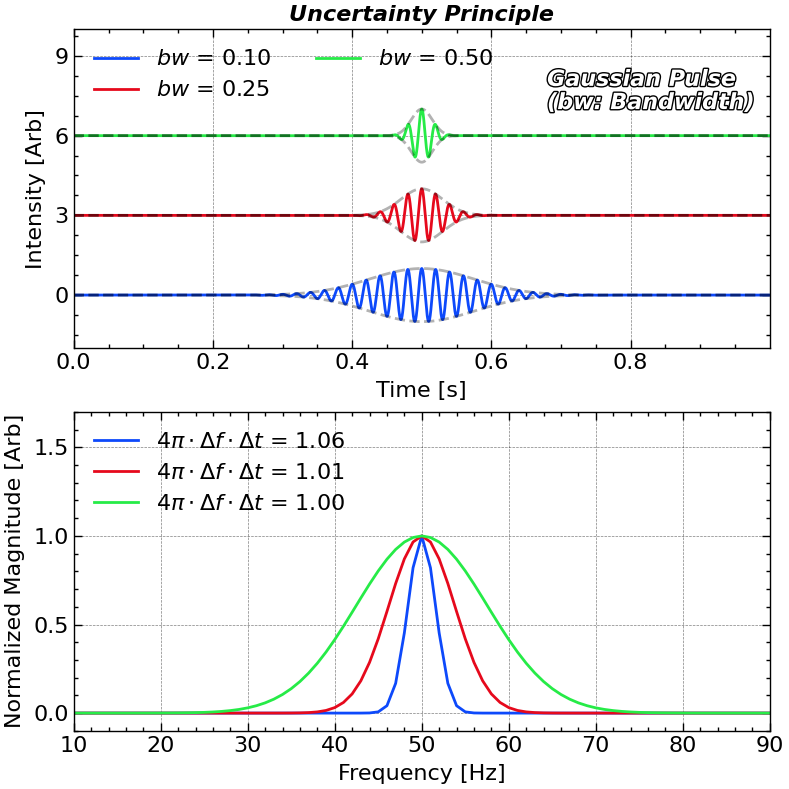

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()
plt.gcf()
plt.gca()

N = 2 ** 14
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
omega = 50.0 * 2 * np.pi
bws = np.array([0.1, 0.25, 0.5])

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

for idx, bw in enumerate(bws):
    # sig = np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)) * np.cos(omega * t)  # 50 Hz 的正弦波调制的高斯脉冲
    sig, sig_env = scipy.signal.gausspulse(t - np.mean(t), fc = omega / 2 / np.pi, bw = bw, retenv = True)
    ax1.plot(t, 3.0 * idx + sig, label = r"$bw$ = %.2f" % bw, linestyle = '-')
    ax1.plot(t, 3.0 * idx + sig_env, 'k--', alpha = 0.3)
    ax1.plot(t, 3.0 * idx - sig_env, 'k--', alpha = 0.3)
    # ax1.plot(t, 3.0 * idx + np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)), 'k--', alpha = 0.3)
    # ax1.plot(t, 3.0 * idx - np.exp(-((t - np.mean(t))**2) / (2 * sigma**2)), 'k--', alpha = 0.3)

    sig -= np.mean(sig)  # 去除直流分量
    # ----- 频域谱 -----
    freq, psd = scipy.signal.welch(sig, fs, nperseg = N)  # 使用Welch方法计算功率谱密度

    t0 = np.sum(t * np.abs(sig)**2) / np.sum(sig ** 2)        # 中心时刻
    delta_t = np.sqrt(np.sum(((t - t0)**2) * sig**2) / np.sum(sig**2))
    
    f0 = np.sum(freq * psd) / np.sum(psd)
    delta_f = np.sqrt(np.sum(((freq - f0)**2) * psd) / np.sum(psd))

    ax2.plot(freq, psd / np.max(psd), label = r"$4\pi \cdot \Delta f \cdot \Delta t$ = %.2f" % (4 * np.pi * delta_t * delta_f), linestyle = '-')

# ---------------- 轴标签与图例 ----------------
# ax1.set_title("Gaussian Pulses (Time Domain)")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Intensity [Arb]")

# ax2.set_title("Magnitude Spectra (Frequency Domain)")
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Normalized Magnitude [Arb]")

ax1.text(0.68, 7.0, 'Gaussian Pulse\n(bw: Bandwidth)', **title_font, color = 'w', path_effects = path_effect)
ax1.set_ylim(-2, 10)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax1.legend(frameon = False, ncols = 2, loc = 'upper left')
ax2.legend(frameon = False, ncols = 1, loc = 'upper left')

ax1.autoscale(axis = 'x', tight=True)
ax2.set_xlim(10, 90)
ax2.set_ylim(-0.1, 1.7)
ax1.set_title('Uncertainty Principle', **title_font)

plt.tight_layout()

plt.savefig(save_path + 'figure_uncertainty_principle' + '.png',bbox_inches='tight',dpi=300)
plt.show()